## Performing the EDA - Exploratory Data Analysis

<b> <u>Problem Statement :</u></b>

As a solution specialist the client has approached you to analyse the data and arrive at solution using machine learning to predict the customer cancellation rate. and predict that customer will cancle their bookings or not which have booked by them.

In [233]:
# importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [234]:
# Reading the data set
data = pd.read_csv('assets/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [235]:
# No. of data points in the dataset
print('No of data points in the data set',data.shape[0])
# No. of columns in the dataset
print('No of columns in the dataset',data.shape[1])

No of data points in the data set 119390
No of columns in the dataset 32


In [236]:
# creating a list of the data labels

l = data.columns.tolist()
print(l)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [237]:
# Printing the data types for each column

data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [238]:
# Starting with the data examination
data.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [239]:
data.tail(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119370,City Hotel,0,201,2017,August,35,30,1,4,1,...,No Deposit,9.0,NaN,0,Transient,108.00,0,2,Check-Out,2017-09-04
119371,City Hotel,0,175,2017,August,35,31,1,3,2,...,No Deposit,42.0,NaN,0,Transient,86.85,0,2,Check-Out,2017-09-04
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04
119373,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04
119374,City Hotel,0,201,2017,August,35,29,1,5,2,...,No Deposit,9.0,NaN,0,Transient,117.00,0,2,Check-Out,2017-09-04
119375,City Hotel,0,200,2017,August,35,30,1,4,2,...,No Deposit,16.0,NaN,0,Transient,85.50,0,1,Check-Out,2017-09-04
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,2017-09-04
119377,City Hotel,0,185,2017,August,35,30,1,4,2,...,No Deposit,9.0,NaN,0,Transient,99.00,0,1,Check-Out,2017-09-04
119378,City Hotel,0,247,2017,August,35,31,1,3,2,...,No Deposit,42.0,NaN,0,Transient,86.85,0,0,Check-Out,2017-09-04
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Check-Out,2017-09-04


In [240]:
# Modifying the hotel to resort hotel -> resort

data['hotel'] = data.hotel.str.replace('Hotel','')

In [241]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [242]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [243]:
# Finding the number of each type of hotel present

data['hotel'].value_counts()

City       79330
Resort     40060
Name: hotel, dtype: int64

In [244]:
# Describing the type of data

data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [245]:
# Printing the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<b> Treating the missing values </b>

In [246]:
# Finding if any field contains Nan values

null_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]

In [247]:
null_features

['children', 'country', 'agent', 'company']

In [248]:
# Printing the percentages of the null features
missing_percentage_dict = {}
for i in null_features:
    perc = data[i].isnull().sum()/len(data)
    missing_percentage_dict[i] = perc*100

In [249]:
missing_percentage_dict

{'children': 0.003350364352123293,
 'country': 0.40874445095904177,
 'agent': 13.686238378423655,
 'company': 94.30689337465449}

<b> Observation - 1 :</b>

In the above null features the company data has ~ 94% missing values and therefore must be dropped from the dataset


In [250]:
data = data.drop(['company'],axis=1)

In [251]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [252]:
# updating the null features list

null_features = ['children', 'country', 'agent']

In [253]:
data[null_features].head()

,children,country,agent
0,0.0,PRT,NaN
1,0.0,PRT,NaN
2,0.0,GBR,NaN
3,0.0,GBR,304.0
4,0.0,GBR,240.0


In [254]:
del missing_percentage_dict['company']

In [255]:
missing_percentage_dict

{'children': 0.003350364352123293,
 'country': 0.40874445095904177,
 'agent': 13.686238378423655}

In [256]:
# replacing the Nan values in the agent children and country with the median values
# data[null_features] = data[null_features].fillna(0)
data['agent'] = data['agent'].fillna(0)

In [257]:
# checking the percentages of the null values
null_features = [feature for feature in data.columns if data[feature].isna().sum()>1]

In [258]:
null_features

['children', 'country']

In [259]:
data = data.fillna(method='ffill')

In [260]:
missing_percentage_dict2 = {}
for i in null_features:
    perc = data[i].isnull().sum()/len(data)
    missing_percentage_dict2[i] = perc*100
missing_percentage_dict2

{'children': 0.0, 'country': 0.0}

Result of the Null features treatment :

- Dropped the company column from the dataset

- Filled the 0 values with the forward fill assignment as the missing value percentages is low

- Replaced all the Nan value in agent with the 0


### Result : Handled the missing values

In [261]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [262]:
# Printing the shape of the data set
data.shape

(119390, 31)

In [263]:
# Finding out the numerical features

numerical_features = [feature for feature in data.columns if data[feature].dtypes!='O']

In [264]:
numerical_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [265]:
# Finding out the categorical features

categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']

In [266]:
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

<b> Treating the outliers </b>

In [267]:
# Our dependent variable will be is_cancelled
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [268]:
data['is_canceled'].describe()

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

In [269]:
# Finding the correlations with the numerical features
print(len(numerical_features))
numerical_features = [i for i in numerical_features if i!='is_canceled']


19


In [273]:
data_nums = data.select_dtypes(include=['float64','int64'])

In [274]:
data_nums_corr = data_nums.corr()['is_canceled'][:-1]

In [275]:
data_nums_corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.046529
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
Name: is_canceled, dtype: float64

In [277]:
# Gaining the strongly co-related data 

strong_correlated_features = data_nums_corr[abs(data_nums_corr)>0.5].sort_values(ascending=False)

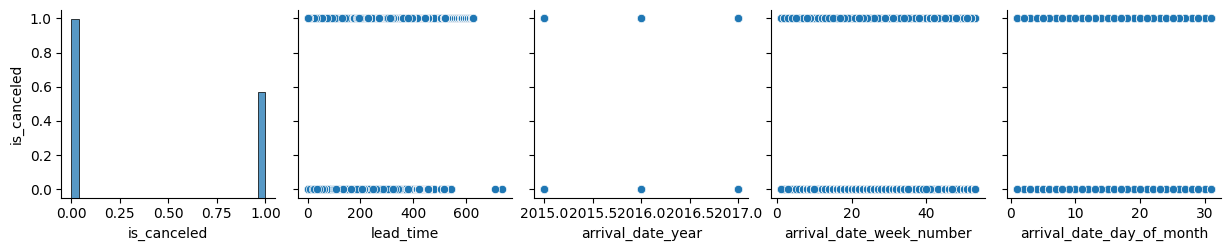

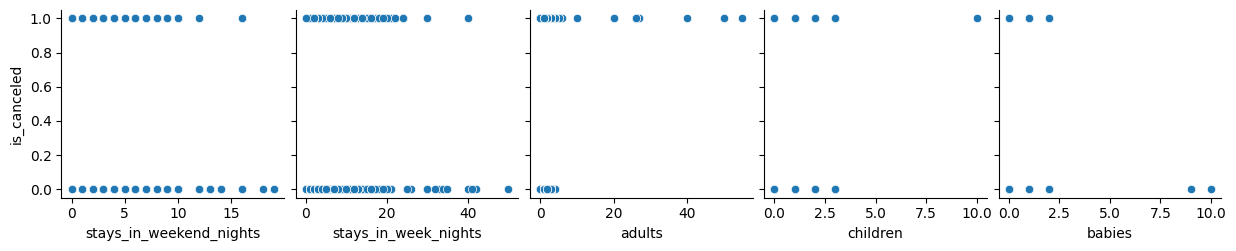

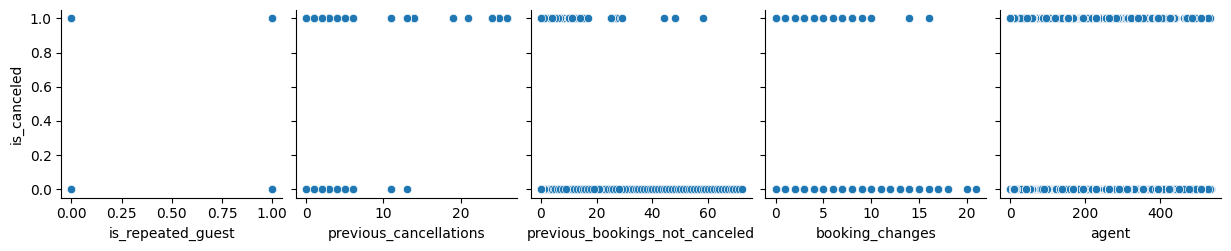

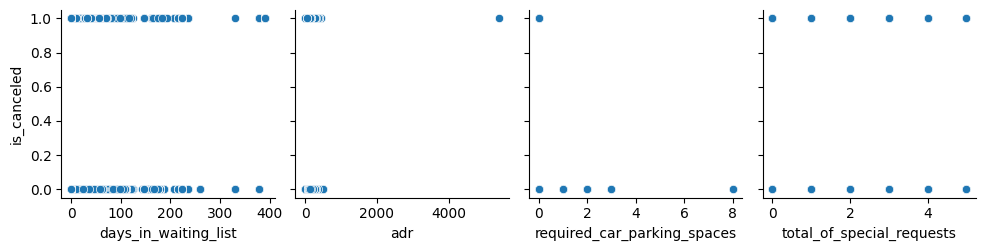

In [280]:
# Plotting the strongly co-related features
for i in range(0,len(data_nums_corr),5):
    sns.pairplot(data=data_nums,
    x_vars=data_nums.columns[i:i+5],
    y_vars = ['is_canceled'])

/var/folders/4r/21z41gt55tdf56zf__j7s8b80000gn/T/ipykernel_1810/2613552969.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['is_canceled'])


<AxesSubplot: xlabel='is_canceled', ylabel='Density'>

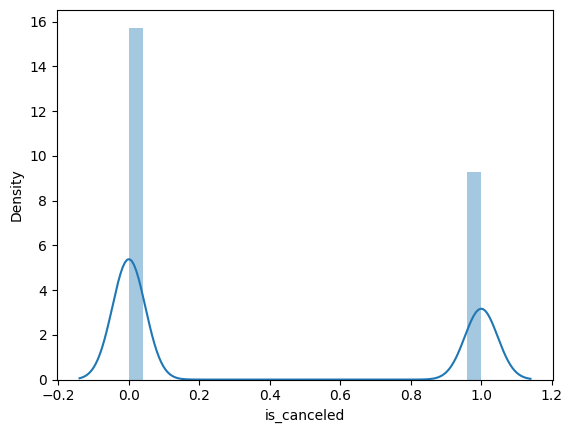

In [282]:
# Plotting a dist_plot of is_canceled

sns.distplot(data['is_canceled'])

In [283]:
# skewness of the above data

print("skewness :",data['is_canceled'].skew())

skewness : 0.5366783893964283
